In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Followup Question
## How do the eigenvalues change with $\theta$?

In [3]:
def gen_mask(length, p, prob_func='constant'):
    """
    Call of prob_func gives 1 or 0 with certain probability.
    """
    mask_mat = np.zeros((length, length))
    for i in range(length):
        for j in range(length):
            if i >= j:
                val = 0
                r = np.random.uniform()
                prob = 0
                if prob_func == 'pn':
                    prob = p
                if prob_func == 'log':
                    prob = p * np.log(length) / length
                if prob_func == 'p':
                    prob = p / length
                if r <= prob:
                    val = 1
                mask_mat[i, j] = val
                mask_mat[j, i] = val
    return mask_mat


def get_spectrum(n, theta, mask):
    G = np.random.normal(size=(n, n))
    X = (G + np.transpose(G)) / (2*n)**0.5
    u = np.random.rand(n)
    u = u / np.linalg.norm(u)
    u = u[None, :]
    X_tilda = X + theta * u * u.transpose()
    X_bar = X_tilda * mask
    eigvals, eigvecs = np.linalg.eig(X_bar)
    idx = np.argmax(eigvals)
    max_eigvec = eigvecs[:, idx]
    inner_prod = np.inner(max_eigvec, u.reshape(-1))
    return sorted(eigvals), inner_prod

In [ ]:
thetas = [1, 10, 20, 30, 40, 50, 100]
p = 0.2
n = 100

## d = p * n

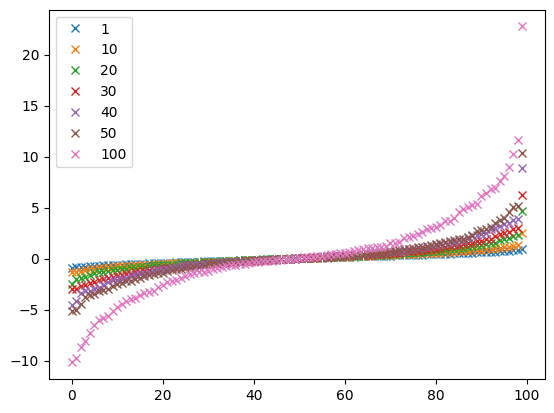

In [7]:
eigvals_list = []
ip_list = []
for theta in thetas:
    mask = gen_mask(n, p, 'pn')
    eigvals, inner_prod = get_spectrum(n, theta, mask)
    eigvals_list.append(eigvals)
    ip_list.append(inner_prod)
for i in range(len(thetas)):
    plt.plot(eigvals_list[i], 'x', label=f'{thetas[i]}')
plt.legend()
plt.show()  

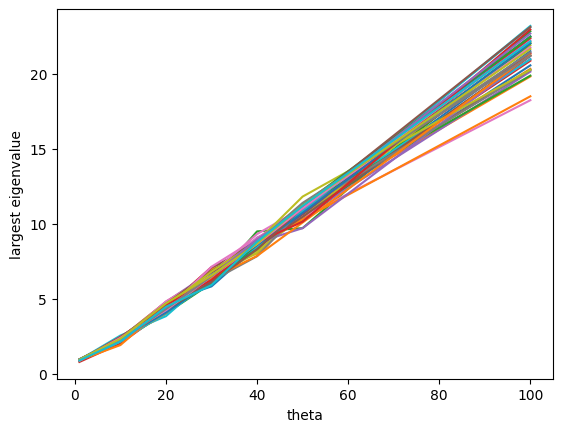

In [14]:
trials = 40
for _ in range(trials):
    eigvals_list = []
    ip_list = []
    for theta in thetas:
        mask = gen_mask(n, p, 'pn')
        eigvals, inner_prod = get_spectrum(n, theta, mask)
        eigvals_list.append(eigvals)
        ip_list.append(inner_prod)
    largest_eigvals = []
    for eigvals in eigvals_list:
        largest_eigvals.append(np.max(eigvals))
    plt.plot(thetas, largest_eigvals)
plt.xlabel('theta')
plt.ylabel('largest eigenvalue')
plt.show()

## d = p * log(n)

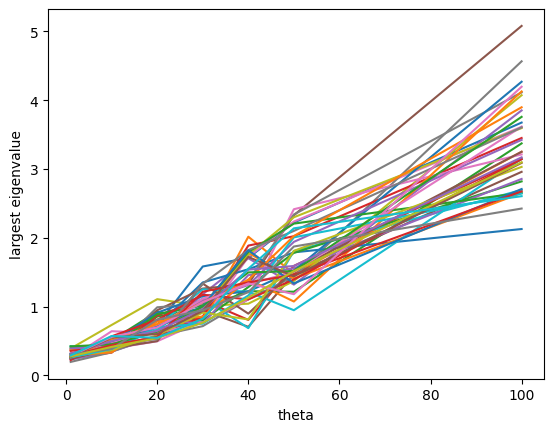

In [13]:
trials = 40
for _ in range(trials):
    eigvals_list = []
    ip_list = []
    for theta in thetas:
        mask = gen_mask(n, p, 'log')
        eigvals, inner_prod = get_spectrum(n, theta, mask)
        eigvals_list.append(eigvals)
        ip_list.append(inner_prod)
    largest_eigvals = []
    for eigvals in eigvals_list:
        largest_eigvals.append(np.max(eigvals))
    plt.plot(thetas, largest_eigvals)
plt.xlabel('theta')
plt.ylabel('largest eigenvalue')
plt.show()

## d = p

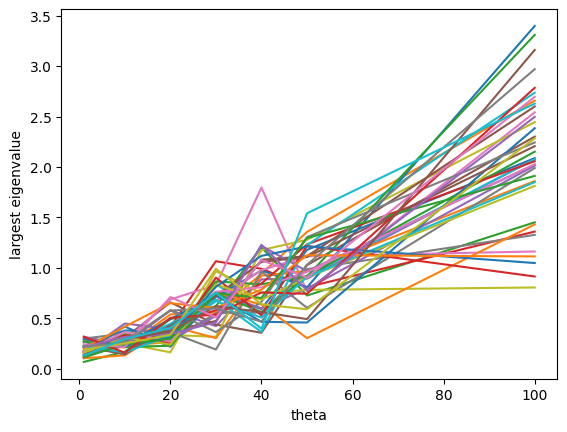

In [12]:
trials = 40
for _ in range(trials):
    eigvals_list = []
    ip_list = []
    for theta in thetas:
        mask = gen_mask(n, p, 'p')
        eigvals, inner_prod = get_spectrum(n, theta, mask)
        eigvals_list.append(eigvals)
        ip_list.append(inner_prod)
    largest_eigvals = []
    for eigvals in eigvals_list:
        largest_eigvals.append(np.max(eigvals))
    plt.plot(thetas, largest_eigvals)
plt.xlabel('theta')
plt.ylabel('largest eigenvalue')
plt.show()